# Homework 8 (Due 6/4/2025 at 11:59pm)

## Name:

## ID:

**Submission instruction:**
- Download the file as .ipynb (see top right corner on the webpage).
- Write your name and ID in the field above.
- Answer the questions in the .ipynb file in either markdown or code cells.
- Before submission, make sure to rerun all cells by clicking `Kernel` -> `Restart & Run All` and check all the outputs.
- Upload the .ipynb file to Gradescope.

In this homework, we will use the handwritten digits dataset to explore dimensionality reduction and clustering techniques.

**Q1** This question demonstrates the workflow of dimensionality reduction and clustering: applying PCA, then t-SNE, and finally clustering the data using KMeans.


**(1)** Load the handwritten digits dataset from sklearn. Perform PCA and keep enough components to explain at least 80% of the variance. Report the number of components used.

In [17]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Perform PCA to keep 80% variance
pca = PCA(n_components=0.8, svd_solver='full')
X_pca = pca.fit_transform(X)
num_components = pca.n_components_
print(f"Number of components to keep 80% variance: {num_components}")

Number of components to keep 80% variance: 13


**(2)** Use t-SNE on the PCA-reduced data to further reduce it to 2 dimensions. Use a perplexity of 30. Visualize the result with a scatter plot, coloring by digit label.

An example figure is shown below. The results may vary due to the stochastic nature of t-SNE and KMeans.

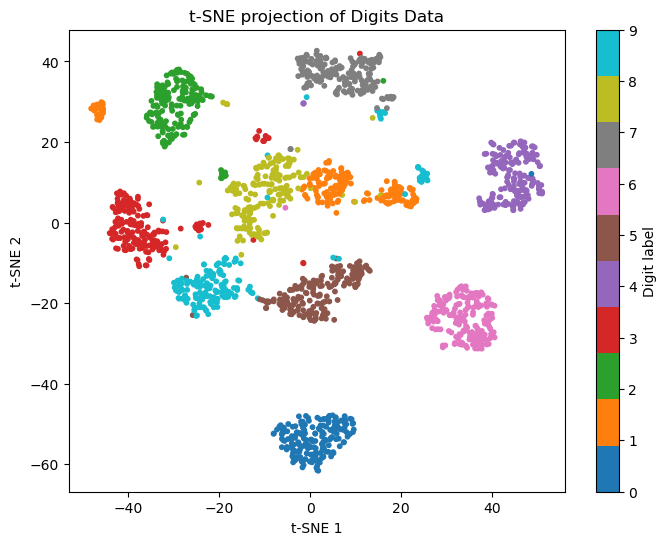

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE projection to 2D
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_pca)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10), label='Digit label')
plt.title('t-SNE projection of Digits Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

**(3)**
Using the 2D representation from t-SNE, set K=10 and perform k-means clustering. Plot the result by coloring each point according to its assigned cluster label. Compare the clustering result visually with the true digit labels from the previous step.

An example figure is shown below. The results may vary due to the stochastic nature of t-SNE and KMeans.

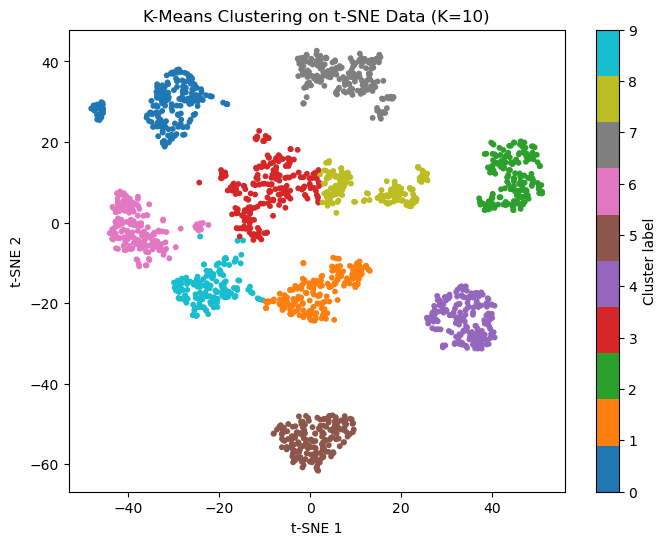

In [19]:
# Set K=10 and perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X_tsne)

# Plot the clustering result
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_kmeans, cmap='tab10', s=10)
plt.colorbar(scatter, ticks=range(10), label='Cluster label')
plt.title('K-Means Clustering on t-SNE Data (K=10)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

**Q2** This questions demonstrates the workflow of dimensionality reduction and classification.

**(1)** Load the handwritten digits dataset from sklearn. Split the data into training and test sets with a 60:40 ratio.

In [20]:
# (1) Load data and train-test split
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 1078, Test set size: 719


**(2)** In practice, the test data are unseen during training. Perform PCA on the training set to reduce dimensionality (keep 70% variance). Train a logistic regression classifier on the PCA-reduced training data. Report the accuracy on the training set.



In [21]:
# (2) PCA on train set, train logistic regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=0.7, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
print(f"Number of PCA components (70% variance): {pca.n_components_}")

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_pca, y_train)
train_acc_logreg = logreg.score(X_train_pca, y_train)
print(f"Logistic Regression train accuracy: {train_acc_logreg:.3f}")

Number of PCA components (70% variance): 9
Logistic Regression train accuracy: 0.950


**(3)** For the test set, transform the data using the PCA fitted on the training set, make predictions using the trained logistic regression classifier, and report the accuracy on the test set.



In [22]:
# (3) Transform test set, predict, report accuracy
X_test_pca = pca.transform(X_test)
test_acc_logreg = logreg.score(X_test_pca, y_test)
print(f"Logistic Regression test accuracy: {test_acc_logreg:.3f}")

Logistic Regression test accuracy: 0.922


**(4)** Repeat steps (2) and (3) using an MLPClassifier with 2 hidden layers of 64 neurons each. Report the accuracy on both the training and test sets.

In [23]:
# (4) Repeat with MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 64), random_state=42, max_iter=300)
mlp.fit(X_train_pca, y_train)
train_acc_mlp = mlp.score(X_train_pca, y_train)
test_acc_mlp = mlp.score(X_test_pca, y_test)
print(f"MLPClassifier train accuracy: {train_acc_mlp:.3f}")
print(f"MLPClassifier test accuracy: {test_acc_mlp:.3f}")

MLPClassifier train accuracy: 1.000
MLPClassifier test accuracy: 0.950
